In [4]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
n = 4
m = 2 

A = np.array([
[ 0.95,  0.16,  0.12,  0.01],
[-0.12,  0.98, -0.11, -0.03],
[-0.16,  0.02,  0.98,  0.03],
[-0.  ,  0.02, -0.04,  1.03],
])

B = np.array([
[ 0.8 , 0. ],
[ 0.1 , 0.2],
[ 0.  , 0.8],
[-0.2 , 0.1],
])

x_init = np.ones(n)

T = 100

Sum of squares of 2-norm cost: 0.5156134515414273


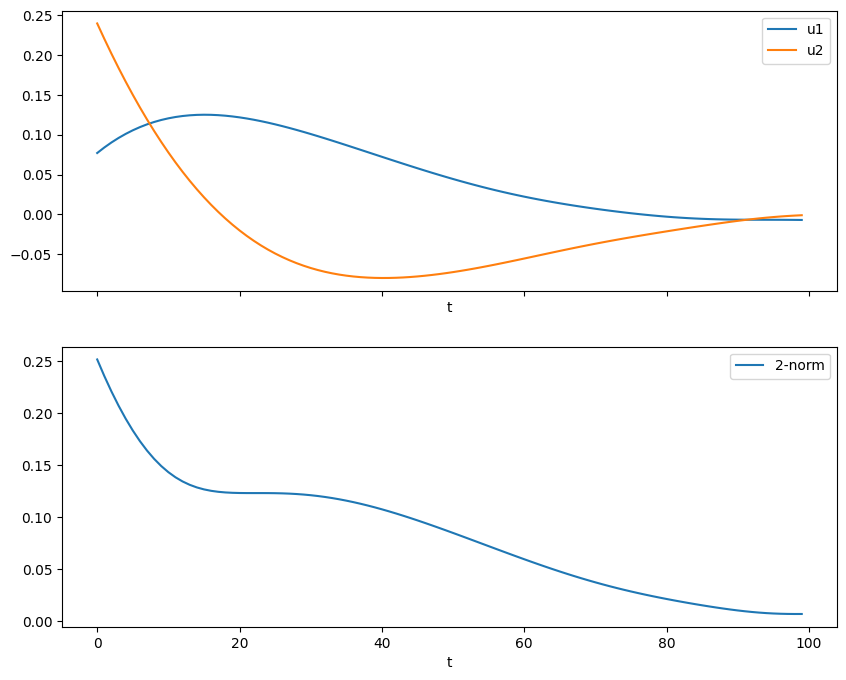

In [6]:
def plot_control(u):
  u1 = u[0, :]
  u2 = u[1, :]

  # Create the figure and subplots
  fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))
  
  # Plot the first subplot with u1 on the y-axis
  axs[0].plot(u1, label='u1')
  axs[0].plot(u2, label='u2')
  axs[0].set_xlabel('t')

  # Plot the second subplot with u2 on the y-axis
  axs[1].plot(cp.norm2(u, axis=0).value, label='2-norm')
  axs[1].set_xlabel('t')

  axs[0].legend()
  axs[1].legend()
  plt.show()

x_final = np.zeros(n)

X = []
for t in np.arange(T-1, 0, -1):
  X.append(np.linalg.matrix_power(A, t) @ B)
X = np.hstack(X)


u = cp.Variable((2, T))
X = cp.Variable((n, T + 1))

constraints = []
for t in np.arange(1, T + 1):
  constraints += [X[:, t] == A @ X[:, t-1] + B @ u[:, t - 1]]

constraints += [X[:, 0] == x_init, X[:, T] == x_final]

problem = cp.Problem(cp.Minimize(cp.norm(u) **2), constraints)
min_cost1 = problem.solve()
print(f'Sum of squares of 2-norm cost: {min_cost1}')

plot_control(u.value.reshape(2, -1))

Sum of 2-norms cost: 5.996853385464538


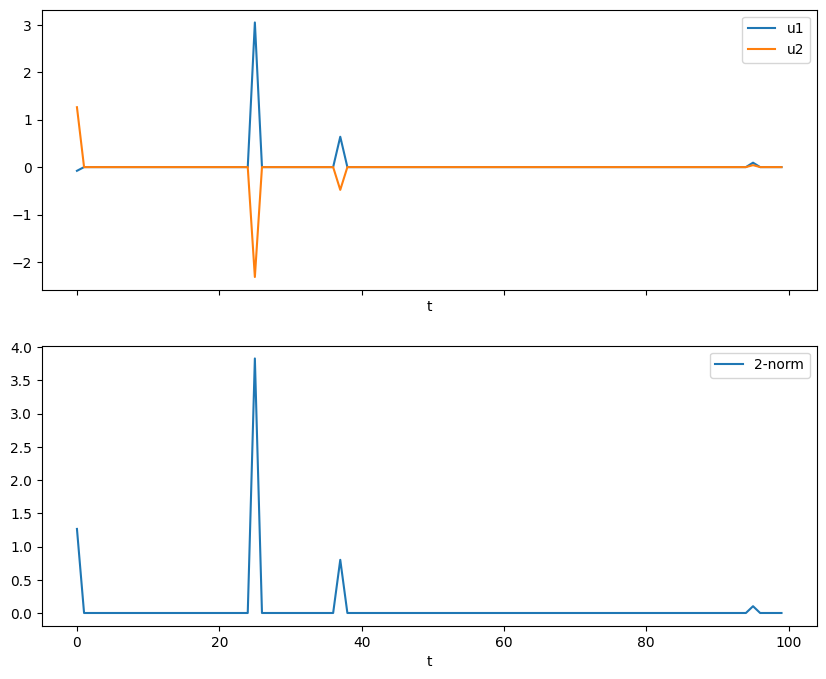

In [7]:
problem = cp.Problem(cp.Minimize(cp.sum(cp.norm2(u, axis=0))), constraints)
min_cost1 = problem.solve()
print(f'Sum of 2-norms cost: {min_cost1}')

plot_control(u.value.reshape(2, -1))

Max of 2 norms cost: 0.11047020864702092


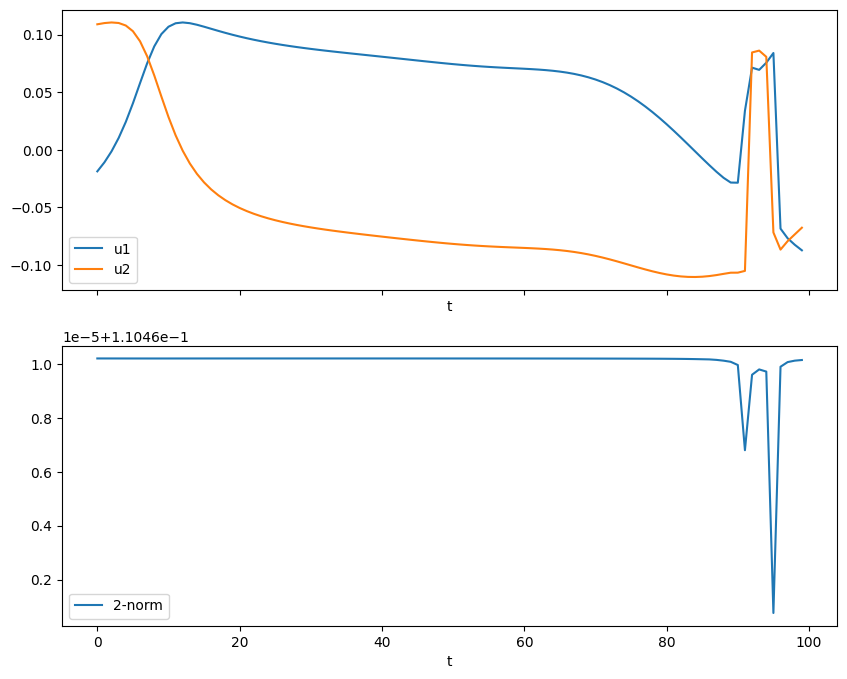

In [8]:
problem = cp.Problem(cp.Minimize(cp.max(cp.norm2(u, axis=0))), constraints)
min_cost1 = problem.solve()
print(f'Max of 2 norms cost: {min_cost1}')

plot_control(u.value.reshape(2, -1))

Sum of 1-norms cost: 7.04428882603796


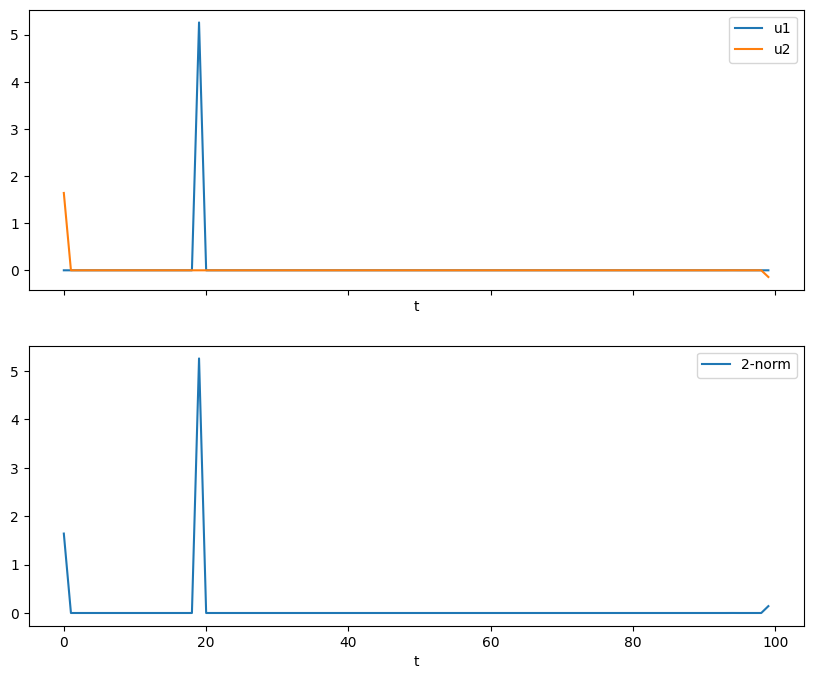

In [9]:
problem = cp.Problem(cp.Minimize(cp.sum(cp.norm1(u, axis=0))), constraints)
min_cost1 = problem.solve()
print(f'Sum of 1-norms cost: {min_cost1}')

plot_control(u.value.reshape(2, -1))